<a href="https://colab.research.google.com/github/kittimaxz/Project_BoneAge/blob/main/CropImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # ใช้ในการคำนวณค่าทางคณิตศาสตร์ เกี่ยวกับบการจัดการค่า array
import cv2 # library ในการจัดการรูปภาพ
!pip install pydicom # install pydicom เพื่อใช้ในการอ่านไฟล์ .dcm
import pydicom # เรียกใช้ pydicom
import matplotlib.pyplot as plt # ใช้ในการ plot graph 2D จาก array
from skimage.transform import resize # เป็น module ที่ใช้ในการปรับขนาดรูปภาพ

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์

In [4]:
path = '/content/drive/My Drive/Project_Boneage'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

In [5]:
img_file  = os.path.join(path,'pydicom/1377.dcm') # ชี้ path ของภาพที่ใช้
img = pydicom.dcmread(img_file) # อ่านภาพที่ต้องการ
img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 54
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.25403.1.1.1
(0002, 0013) Implementation Version Name         SH: '1.0.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0028, 0002) Samples per Pixel                   US: 3
(0028, 0004) Photometric Interpretation          CS: 'RGB'
(0028, 0006) Planar Configuration                US: 0
(0028, 0008) Number of Frames                    IS: '1'
(0028, 0010) Rows                                US: 2044
(0028, 0011) Columns                             US: 1514
(0028, 0100) Bits Allocated                      US: 8
(0028, 0101) Bits Stored                         US: 8
(0028, 0102) High Bit    

** ก่อนปรับขนาดภาพ มีขนาดกว้าง(w) x ยาว(h)

In [6]:
w = int(img.pixel_array.shape[0])
w

2044

In [7]:
h = int(img.pixel_array.shape[1])
h

1514

**Resize the pixels # ปรับขนนาดภาพในแนวกว้าง(w) x ยาว(h) ลง 0.25**

In [8]:
w = int(img.pixel_array.shape[0] * .25)
w

511

In [9]:
h = int(img.pixel_array.shape[1] * .25)
h

378

**ก่อนปรับขนาดภาพ pixel**

In [10]:
px = img.pixel_array
px

array([[[241, 241, 241],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [ 70,  70,  70],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       [[241, 241, 241],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 71,  71,  71]],

       [[240, 240, 240],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [ 74,  74,  74],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       ...,

       [[232, 232, 232],
        [225, 225, 225],
        [228, 228, 228],
        ...,
        [ 48,  48,  48],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[235, 235, 235],
        [228, 228, 228],
        [230, 230, 230],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[234, 234, 234],
        [229, 229, 229],
        [232, 232, 232],
        ...,
        [ 48,  48,  48],
        [ 51,  51,  51],
        [ 51,  51,  51]]

**ก่อนปรับขนาดภาพ pixel**

In [11]:
px = img.pixel_array / 255
px

array([[[0.94509804, 0.94509804, 0.94509804],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        ...,
        [0.2745098 , 0.2745098 , 0.2745098 ],
        [0.30196078, 0.30196078, 0.30196078],
        [0.29803922, 0.29803922, 0.29803922]],

       [[0.94509804, 0.94509804, 0.94509804],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        ...,
        [0.28235294, 0.28235294, 0.28235294],
        [0.28235294, 0.28235294, 0.28235294],
        [0.27843137, 0.27843137, 0.27843137]],

       [[0.94117647, 0.94117647, 0.94117647],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        ...,
        [0.29019608, 0.29019608, 0.29019608],
        [0.27843137, 0.27843137, 0.27843137],
        [0.2745098 , 0.2745098 , 0.2745098 ]],

       ...,

       [[0.90980392, 0.90980392, 0.90980392],
        [0.88235294, 0.88235294, 0.88235294],
        [0.89411765, 0

In [12]:
img = resize(px, (w, h), anti_aliasing=True).astype(float) # ปรับขนาดภาพโดยที่ px(w,h) ซึ่งใช้ anti_aliasing = true ทำให้ขนาดภาพเมื่อปรับเรียบมากขึ้น
img

array([[[0.93360937, 0.93360937, 0.93360937],
        [0.94981161, 0.94981161, 0.94981161],
        [0.92336258, 0.92336258, 0.92336258],
        ...,
        [0.27697558, 0.27697558, 0.27697558],
        [0.2876319 , 0.2876319 , 0.2876319 ],
        [0.285048  , 0.285048  , 0.285048  ]],

       [[0.9382592 , 0.9382592 , 0.9382592 ],
        [0.95266854, 0.95266854, 0.95266854],
        [0.92567384, 0.92567384, 0.92567384],
        ...,
        [0.27567101, 0.27567101, 0.27567101],
        [0.27865395, 0.27865395, 0.27865395],
        [0.28056282, 0.28056282, 0.28056282]],

       [[0.93590403, 0.93590403, 0.93590403],
        [0.94895011, 0.94895011, 0.94895011],
        [0.936194  , 0.936194  , 0.936194  ],
        ...,
        [0.27208269, 0.27208269, 0.27208269],
        [0.27445896, 0.27445896, 0.27445896],
        [0.2859481 , 0.2859481 , 0.2859481 ]],

       ...,

       [[0.88953324, 0.88953324, 0.88953324],
        [0.88265569, 0.88265569, 0.88265569],
        [0.8818829 , 0

In [13]:
# scale the pixels # ปรับขนาดภาพให้อยู่ในขนาดที่ต้องการนำไปใช้
img = (np.maximum(img,0) / img.max()) * 255.0
img = np.uint8(img)
img

array([[[247, 247, 247],
        [251, 251, 251],
        [244, 244, 244],
        ...,
        [ 73,  73,  73],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[248, 248, 248],
        [252, 252, 252],
        [245, 245, 245],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       [[248, 248, 248],
        [251, 251, 251],
        [248, 248, 248],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 75,  75,  75]],

       ...,

       [[235, 235, 235],
        [234, 234, 234],
        [233, 233, 233],
        ...,
        [ 49,  49,  49],
        [ 48,  48,  48],
        [ 48,  48,  48]],

       [[234, 234, 234],
        [229, 229, 229],
        [232, 232, 232],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[236, 236, 236],
        [233, 233, 233],
        [232, 232, 232],
        ...,
        [ 49,  49,  49],
        [ 51,  51,  51],
        [ 50,  50,  50]]

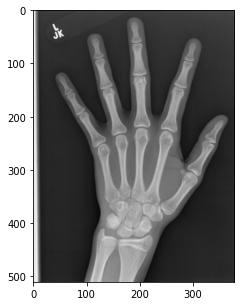

In [14]:
# Display the original image # แสดงภาพก่อนปรับ
plt.figure(figsize=(15,5))
plt.imshow(img,cmap="gray");

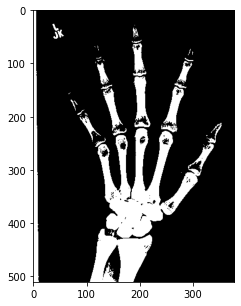

In [15]:
# Make a binarized copy of the image # ทำการ copy ภาพใน binary และปรับเป็นภาพสีเทา
thresh = 140 # กำหนดค่าระดับสี
img_bin = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1] # ทำการแปลงระดับสีให้อยู่ในค่าที่กำหนด

plt.figure(figsize=(15,5)) # กำหนดขนาดของรูปที่จะแสดงให้อยู่ในขนาด 15 x 5 
plt.imshow(img_bin,cmap="gray"); # แสดงภาพเป็นสีเทา

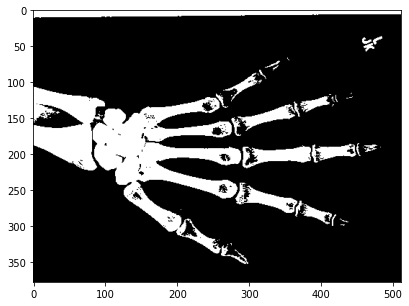

In [16]:
# Flip the image 90 degrees # ทำการพลิกภาพในระดับ 90 องศา
img_bin = cv2.rotate(img_bin, cv2.ROTATE_90_CLOCKWISE)
plt.figure(figsize=(15,5)) # กำหนดขนาดของรูปที่จะแสดงให้อยู่ในขนาด 15 x 5 
plt.imshow(img_bin,cmap="gray"); # แสดงภาพเป็นสีเทา

1.เมื่อพลิกภาพ เราสามารถแยกแถวและคำนวณค่าเฉลี่ยได้

2.แถวใดๆ ที่ 'มืดเกินไป' อาจไม่ใช่ส่วนหนึ่งของผู้ป่วยและสามารถครอบตัดได้

In [17]:
right = 0;
left = 0;
line_thickness = 2 

# This is the value that specifies how bright a row is to consider it 'not the edge (too bright)' เป็นค่าที่กำหนดความสว่างของแถวให้พิจารณาว่า 'ไม่สว่างเกินไป'
intensity_threshold = 190

In [18]:
# Start at the bottom and work upwards checking the mean of pixels in every 10th row, this is the right side of the image  # เริ่มต้นที่ด้านล่างแล้วตรวจสอบค่าเฉลี่ยของพิกเซลในทุกแถวที่ 10 ขึ้นไป นี่คือด้านขวาของภาพ
for i in range(img_bin.shape[0]-1,0,-10):
    row_mean = img_bin[i].mean()
    if row_mean > intensity_threshold:
        right = i
        
        # Draw a line where we want to crop # วาดเส้นตรงที่เราต้องการครอบตัด
        cv2.line(img_bin, (0, i), (img_bin.shape[1], i), (0, img_bin.shape[1], 0), thickness=line_thickness)
        break

In [19]:
# Start at the top and go down to find the left side # เริ่มต้นที่ด้านบนแล้วลงไปหาด้านซ้าย
for i in range(0,img_bin.shape[0]-1,10):
    row_mean = img_bin[i].mean()
    if row_mean > intensity_threshold:
        left = i
        
        # Draw a line where we want to crop # วาดเส้นตรงที่เราต้องการครอบตัด
        cv2.line(img_bin, (0, i), (img_bin.shape[1], i), (0, img_bin.shape[1], 0), thickness=line_thickness)
        break

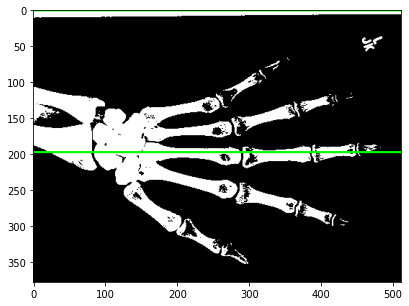

In [20]:
# Draw lines on the image where the mean intensity is > intensity_threshold # ลากเส้นบนรูปภาพที่มีความเข้มเฉลี่ยไปหา intensity_threshold
plt.figure(figsize=(15,5))
plt.imshow(img_bin,cmap="gray");

สองบรรทัดบนรูปภาพแสดงว่าแถวนั้น 'สว่าง' ขึ้นมาก ซึ่งเป็นบริเวณที่จะทำการ crop

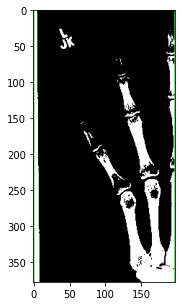

In [21]:
# Rotate the image back to it's normal orientation
img_bin = cv2.rotate(img_bin, cv2.ROTATE_90_COUNTERCLOCKWISE)

x1 = left
y1 = 0
x2 = right
y2 = img_bin.shape[1]

# Grab the region we identified from the binarized image
img_cropped = img_bin[y1:y2, x1:x2]
plt.figure(figsize=(15,5))
plt.imshow(img_cropped,cmap="gray");

ทำซ้ำเพื่อให้ได้ตำแหน่งการ crop ที่ดีที่สุด

In [22]:
top = 0;
bottom = 0;

# Set some threshold values to specify what we consider edge vs patient
bright_threshold = 240 # กำหนดค่าความสว่าง
dark_threshold = 100 # กำหนดค่าความเข้ม

In [23]:
# Start at the bottom and work upward #เริ่มต้นที่ด้านล่างและทำงานขึ้น
for i in range(img_cropped.shape[0]-1,0,-10):
    row_mean = img_cropped[i].mean()
    if row_mean < bright_threshold:
        bottom = i
        cv2.line(img_cropped, (0, bottom), (img_cropped.shape[1], bottom), (0, img_cropped.shape[1], 0), thickness=line_thickness)
        break

In [24]:
# Start at the top and go down #เริ่มจากบนลงล่าง
for i in range(0,img_cropped.shape[0]-1,10):
    row_mean = img_cropped[i].mean()
    if row_mean > dark_threshold:
        top = i
        cv2.line(img_cropped, (0, i), (img_cropped.shape[1], i), (0, img_cropped.shape[1], 0), thickness=line_thickness)
        break

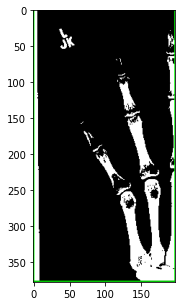

In [25]:
# แสดงบริเวณที่จะ crop
plt.figure(figsize=(15,5)) 
plt.imshow(img_cropped,cmap="gray");

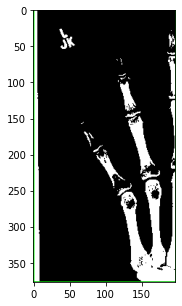

In [26]:
# show ภาพที่ crop
x1 = 0
y1 = top
x2 = img_bin.shape[0]
y2 = bottom

img_cropped = img_cropped[y1:y2, x1:x2]
plt.figure(figsize=(15,5))
plt.imshow(img_cropped,cmap="gray");

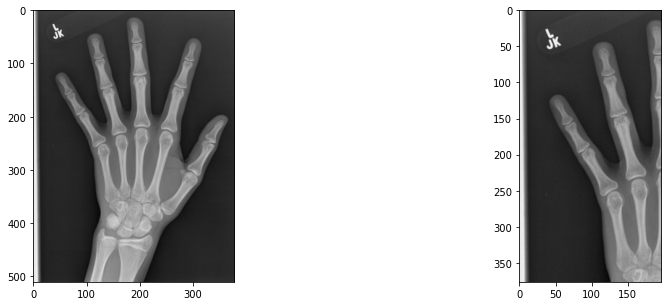

In [27]:
# Display the original image and the cropped section # ทำการเปรียบเทียบภาพก่อนและหลัง crop
img_cropped = img[top:bottom, left:right]
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.imshow(img,cmap="gray");

plt.subplot(1, 2, 2)
plt.imshow(img_cropped,cmap="gray");